## Selenium Import

In [55]:
# selenium 라이브러리에서 webdriver 모듈 임포트, 웹 브라우저를 자동으로 제어하기 위한 기능을 제공
from selenium import webdriver
# 크롬 웹드라이버를 위한 서비스 객체를 사용하기 위해 Service 모듈 임포트
from selenium.webdriver.chrome.service import Service
# 크롬 드라이버의 자동 업데이트를 위해 webdriver_manager에서 ChromeDriverManager를 임포트
from webdriver_manager.chrome import ChromeDriverManager
# 크롬 옵션을 설정하기 위한 Options 모듈을 임포트 일반적으로 브라우저의 특정 옵션을 설정할 때 사용
from selenium.webdriver.chrome.options import Options
# html요소 접근
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time
import pyautogui

# 크롬 브라우저 꺼짐 방지
chrome_options = Options()
chrome_options.add_experimental_option("detach",True)
# 불필요한 에레 메세지 제거
chrome_options.add_experimental_option("excludeSwitches",["enable-logging"])

from bs4 import BeautifulSoup
import pandas as pd

### 크롬 실행

In [56]:
# ChromeDriverManager를 사용해 버전에 맞는 웹드라이버를 다운로드하여 해당 경로를 셀레니움에 전달
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
# 웹페이지가 로딩될대까지 5초대기
driver.implicitly_wait(5)
# 브라우저 크기 최대화
driver.maximize_window()

### 시작 페이지

In [57]:
url = 'https://dhlottery.co.kr/gameResult.do?method=byWin'
driver.get(url)

### 웹페이지에서 그림과 같이 수행하기
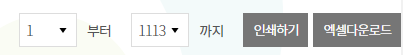

In [58]:
start = driver.find_element(By.CSS_SELECTOR, '#drwNoStart')
start.click()
time.sleep(1)
pyautogui.press('END') # END키 누르기
time.sleep(1)
start.click()

In [59]:
end = driver.find_element(By.CSS_SELECTOR, '#drwNoEnd')
end.click()
time.sleep(1)
pyautogui.press('HOME') # HOME키 누르기
time.sleep(1)
end.click()

### 엑셀 다운로드 버튼 클릭

In [60]:
downloadBtn = driver.find_element(By.CSS_SELECTOR, '#exelBtn')
downloadBtn.click()
time.sleep(2)

### 다운로드 받은 엑셀 파일 경로

In [61]:
xls_file_path = 'C:\\Users\\kh502\\Downloads\\excel.xls'

### 파일 열기

In [62]:
with open(xls_file_path, 'r', encoding='EUC-KR') as file:
    html_content = file.read()

### BeautifulSoup으로 parser

In [63]:
soup = BeautifulSoup(html_content, 'html.parser')

### DataFrame으로 변환 후 저장

In [64]:
# str(soup) : BeautifulSoup 객체를 문자열로 변환합니다.
# pd.read_html() : HTML 테이블을 DataFrame으로 읽어오기
tables = pd.read_html(str(soup))

df = tables[1].iloc[2:]
df.columns = tables[1].iloc[1]
df.to_excel('D:\\kdit\\myjupyter\Webscrap\\lotto\\data_generator\\lotto.xlsx', index=False) # 저장하기

In [65]:
df.shape

(1113, 20)

### Selenium 종료

In [66]:
# 현재 포커스된 창만 닫기
# driver.close()

# 웹드라이버와 함께 연결된 모든 창을 닫고 셀레니엄 세션을 완전히 종료
driver.quit()

## 데이터 분석 및 로또 생성

### 저장한 파일 읽기

In [67]:
df = pd.read_excel('D:\\kdit\\myjupyter\Webscrap\\lotto\\data_generator\\lotto.xlsx')

### 필요한 컬럼만 가져오기 (과거 당첨 로또 번호 6자리 목록)

In [77]:
past_lotto_number_list = df.iloc[:, -7:-1]

### 각 열의 가중치 계산

In [79]:
weights = [ past_lotto_number_list[str(i)].value_counts(normalize=True) for i in range(1, 6+1) ]

### generate_numbers 함수

In [113]:
def generate_numbers(past_lotto_number_list, weights):
    dupCnt = 0
    
    while True:
        # 가중치를 반영한 로또 번호 생성
        numbers = sorted([ np.random.choice(i.index, p=i.values) for i in weights ])
        # 중복 (과거 당첨 번호)
        if not any((past_lotto_number_list == numbers).all(axis=1)):
            return numbers
        else:
            dupCnt += 1
            print(f'중복 {dupCnt}')
    
# numbers = []
# for i in weights:
#     choice = np.random.choice(i.index, p=i.values)
#     numbers.append(choice)

### 사용자에게 로또번호 추출 횟수 입력받기

In [114]:
# cnt = int(input('로또번호 몇개를 생성할까요? : '))
cnt = 5

로또번호 몇개를 생성할까요? : 100


### 횟수 입력 받은거 출력

In [115]:
for i in range(cnt):
    number = generate_numbers(past_lotto_number_list, weights)
    print(f'{i+1}번째 추출된 번호 : {number}')

1번째 추출된 번호 : [1, 4, 17, 20, 41, 45]
2번째 추출된 번호 : [10, 12, 19, 27, 31, 44]
3번째 추출된 번호 : [17, 20, 20, 24, 31, 43]
4번째 추출된 번호 : [3, 26, 26, 33, 34, 35]
5번째 추출된 번호 : [11, 12, 13, 15, 31, 44]
6번째 추출된 번호 : [5, 7, 14, 29, 34, 41]
7번째 추출된 번호 : [1, 15, 15, 32, 35, 43]
8번째 추출된 번호 : [2, 15, 30, 34, 37, 45]
9번째 추출된 번호 : [2, 3, 19, 20, 25, 39]
10번째 추출된 번호 : [17, 18, 25, 27, 28, 39]
11번째 추출된 번호 : [6, 17, 27, 29, 33, 35]
12번째 추출된 번호 : [1, 16, 29, 29, 31, 38]
13번째 추출된 번호 : [1, 14, 17, 22, 39, 44]
14번째 추출된 번호 : [3, 16, 22, 29, 38, 40]
15번째 추출된 번호 : [4, 11, 13, 30, 33, 36]
16번째 추출된 번호 : [1, 18, 24, 26, 28, 40]
17번째 추출된 번호 : [6, 12, 20, 25, 35, 44]
18번째 추출된 번호 : [3, 16, 27, 33, 34, 45]
19번째 추출된 번호 : [4, 15, 19, 19, 39, 40]
20번째 추출된 번호 : [1, 11, 19, 20, 33, 42]
21번째 추출된 번호 : [4, 8, 15, 21, 29, 45]
22번째 추출된 번호 : [8, 15, 27, 35, 38, 42]
23번째 추출된 번호 : [1, 5, 23, 25, 41, 41]
24번째 추출된 번호 : [2, 14, 16, 32, 33, 37]
25번째 추출된 번호 : [1, 8, 11, 21, 38, 42]
26번째 추출된 번호 : [2, 2, 29, 37, 41, 41]
27번째 추출된 번호 : [10, 12, 2